<h1><center>Module 15 Challenge</center></h1>

# Challenge: Factors that affect life expectancy


Throughout this module, we dove deep into the topics of exploratory data analysis (EDA) and its substeps. Now it's time to apply your knowledge. In this challenge, you'll work with the [Life Expectancy dataset](https://www.kaggle.com/kumarajarshi/life-expectancy-who) from Kaggle. The data is collected from the websites of the World Health Organisation (WHO) and World Bank (WB). The dataset contains annual variables for many of the countries in the world which are divided into several broad categories: immunization related factors, mortality factors, economical factors, and social factors.

You should access the data from the Thinkful database. Here's the credentials you can use to connect to the database:

postgres_user = 'dsbc_student'<br>
postgres_pw = '7\*.8G9QH21'<br>
postgres_host = '142.93.121.174'<br>
postgres_port = '5432'<br>
postgres_db = 'lifeexpectancy'<br>
table_name = 'lifeexpectancy'<br>

To complete this challenge, submit a Jupyter notebook containing your solutions to the following tasks. Moreover, you can also submit a kernel to the Kaggle containing your solutions.

* Your goal in this challenge is to find the factors that affect the life expectancy. Specifically, you need to find out which factors increase the expected life in the countries and which factors decrease it.

* First, load the dataset.

* Detect the problems with the data such as missing values and outliers. Are there any nonsense values that seem to be stemmed from the data collection? For the missing values, discuss which technique would be the most suitable one in filling out these values. Regarding the outliers, discuss their potential effects on your analysis and select an appropriate method to deal with them. 

* Explore the data using univariate and multivariate exploration techniques. You should pay special attention to your target variable. In this regard, your focus should be on finding the relevant variables that may affect life expectancy.

* In the feature engineering step, you need to select a suite of variables that you think would be ideal in the modeling phase. More concretely, you may discard some variables that are very correlated with the other ones or the variables that you think irrelevant with the life expectancy.

* Summarize your findings. One of the most important skills of a data scientist is to convey ideas and findings to nontechnical people using understandable language. In this regard, one of the most effective ways to communicate your ideas is to do it using effective visualization.

_________________________________________________________________________________________________________________

##### Import packages

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from scipy.stats.stats import ttest_ind
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

pd.set_option('display.max_columns', 500)

##### Grab data

In [50]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'
table_name = 'lifeexpectancy'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

lifeexpectancy_df = pd.read_sql_query('select * from lifeexpectancy',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [51]:
lifeexpectancy_df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [52]:
lifeexpectancy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

_________________________________________________________________________________________________________________

##### Detect the problems with the data such as missing values and outliers. Are there any nonsense values that seem to be stemmed from the data collection? For the missing values, discuss which technique would be the most suitable one in filling out these values. Regarding the outliers, discuss their potential effects on your analysis and select an appropriate method to deal with them.

In [53]:
#determine fraction of missing values for each variable type...
lifeexpectancy_df.isnull().sum()*100/lifeexpectancy_df.isnull().count()

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Alcohol                             6.603131
percentage expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
 BMI                                1.157250
under-five deaths                   0.000000
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
 HIV/AIDS                           0.000000
GDP                                15.248468
Population                         22.191967
 thinness  1-19 years               1.157250
 thinness 5-9 years                 1.157250
Income composition of resources     5.684139
Schooling                           5.547992
dtype: flo

> * There are a few variables that have a high percentage of missing values. My solution for this is to remove the nulls and interpolate the values.
* We also can see that the column names have an excessive amount of spaces. We can fix that as well.
* Lastly, we also do need to remove the outliers as they will have an outsized influence on effecting the summmary statistics that we apply to our dataset.

###### fix the spacing problem

In [54]:
#rename the columns that have excessive spaces...
lifeexpectancy_df.rename(columns={"Life expectancy ":"Life expectancy", " BMI ":"BMI", " HIV/AIDS":"HIV/AIDS", " thinness  1-19 years":"thinnes 1-19 years",
                                 " thinness 5-9 years":"thinnes 5-9 years", "Diphtheria ":"Diphtheria", "Measles ":"Measles", "under-five deaths ":"under-five deaths"},inplace=True)

In [55]:
lifeexpectancy_df.isnull().sum()*100/lifeexpectancy_df.isnull().count()

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Alcohol                             6.603131
percentage expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
BMI                                 1.157250
under-five deaths                   0.000000
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
HIV/AIDS                            0.000000
GDP                                15.248468
Population                         22.191967
thinnes 1-19 years                  1.157250
thinnes 5-9 years                   1.157250
Income composition of resources     5.684139
Schooling                           5.547992
dtype: flo

##### remove nulls and interpolate the values

In [57]:
#create a fill list...
fill_list = ["Life expectancy", "Adult Mortality", "Alcohol", "Hepatitis B", "BMI", "Polio", "Total expenditure",
            "Diphtheria", "GDP", "Population", "thinnes 1-19 years", "thinnes 5-9 years", "Income composition of resources",
            "Schooling",]

#create country column of unique countries to base fill list...
countrys = lifeexpectancy_df['Country'].unique()

In [58]:
#interpolate the values based of off the country column...
for country in countrys:
    lifeexpectancy_df.loc[lifeexpectancy_df['Country'] == country, fill_list] = lifeexpectancy_df.loc[lifeexpectancy_df['Country'] == country, fill_list].interpolate()

In [59]:
#drop the null values after interpolation...
lifeexpectancy_df.dropna(inplace=True)

##### remove the outliers

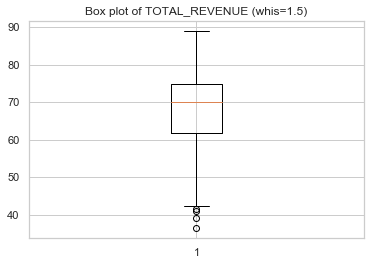

In [32]:
#use a boxplot to see which variables have outliers...
plt.boxplot(lifeexpectancy_df["Life expectancy"])
plt.title("Box plot of TOTAL_REVENUE (whis=1.5)")
plt.show()

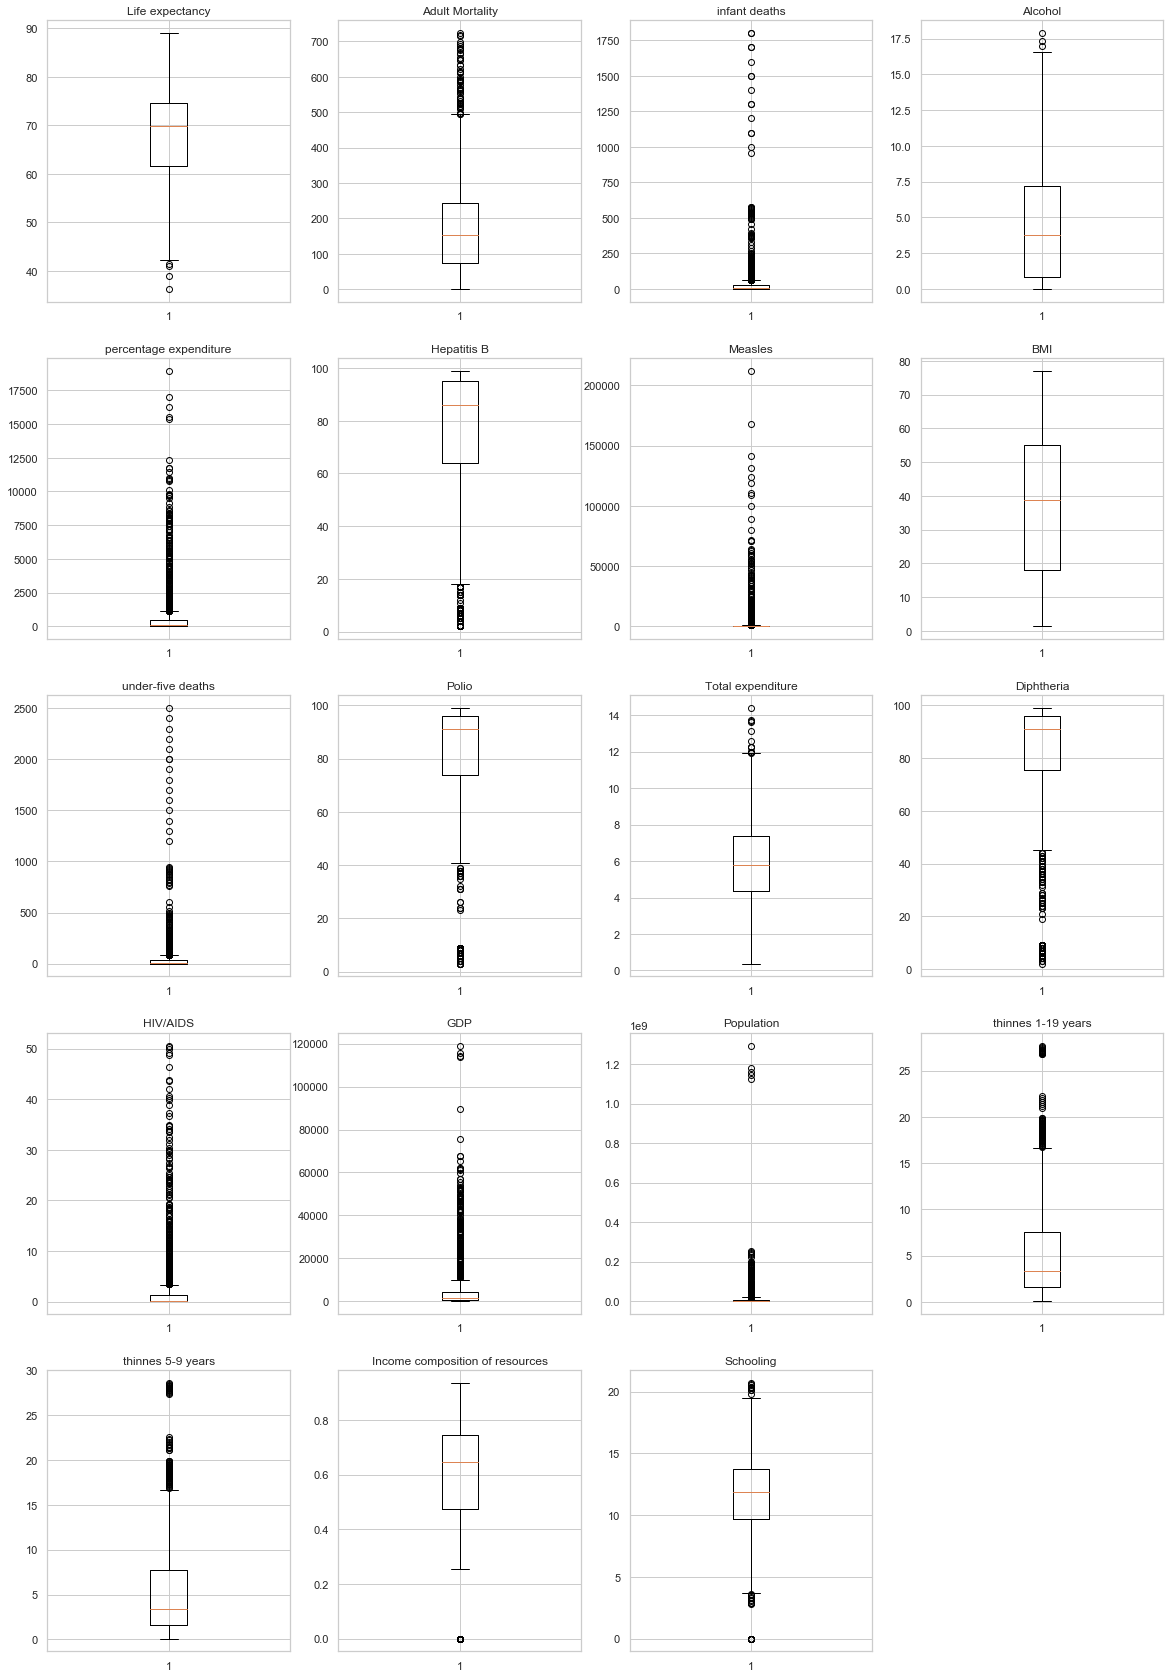

In [60]:
#detect which variables need to be winsorized by plotting box plot of all numeric variables...
col_dict = {'Life expectancy':1,'Adult Mortality':2,'infant deaths':3,'Alcohol':4,'percentage expenditure':5,
            'Hepatitis B':6,'Measles':7,'BMI':8,'under-five deaths':9,'Polio':10,'Total expenditure':11,'Diphtheria':12,
            'HIV/AIDS':13,'GDP':14,'Population':15,'thinnes 1-19 years':16,'thinnes 5-9 years':17,
            'Income composition of resources':18,'Schooling':19}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(lifeexpectancy_df[variable],whis=1.5)
                     plt.title(variable)

plt.show()

> It looks like every numeric value needs to be winsorized, lets start that process.

List of variables to be winsorize:
* Life expectancy
* Adult Mortality
* infant deaths
* Alcohol
* percentage expenditure
* Hepatitis B
* Measles
* BMI
* under-five deaths
* Polio
* Total expenditure
* Diphtheria
* HIV/AIDS
* GDP
* Population
* thinnes 1-19 years
* thinnes 5-9 years
* Income composition of resources
* Schooling

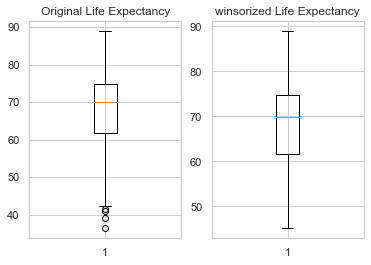

In [63]:
#winsorize life expectancy...
plt.subplot(1,2,1)
OG_lifeexpectancy_df = lifeexpectancy_df['Life expectancy']
plt.boxplot(OG_lifeexpectancy_df)
plt.title("Original Life Expectancy")

plt.subplot(1,2,2)
winsorized_life_expectancy = winsorize(lifeexpectancy_df['Life expectancy'],(0.01,0))
plt.boxplot(winsorized_life_expectancy)
plt.title("winsorized Life Expectancy")

plt.show()

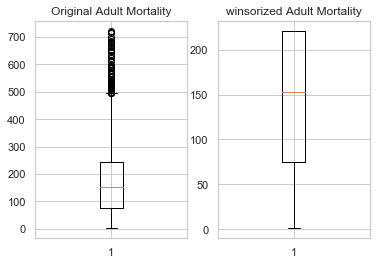

In [66]:
#winsorize Adult Mortality...
plt.subplot(1,2,1)
OG_lifeexpectancy_df = lifeexpectancy_df['Adult Mortality']
plt.boxplot(OG_lifeexpectancy_df)
plt.title("Original Adult Mortality")

plt.subplot(1,2,2)
winsorized_Adult_Mortality = winsorize(lifeexpectancy_df['Adult Mortality'],(0.0,0.3))
plt.boxplot(winsorized_Adult_Mortality)
plt.title("winsorized Adult Mortality")

plt.show()

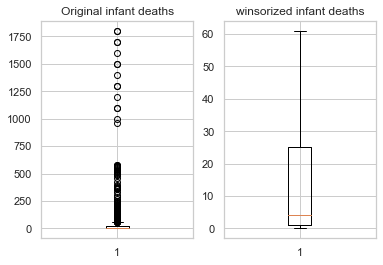

In [71]:
#winsorize infant deaths...
plt.subplot(1,2,1)
OG_lifeexpectancy_df = lifeexpectancy_df['infant deaths']
plt.boxplot(OG_lifeexpectancy_df)
plt.title("Original infant deaths")

plt.subplot(1,2,2)
winsorized_infant_deaths = winsorize(lifeexpectancy_df['infant deaths'],(0.0,0.1))
plt.boxplot(winsorized_infant_deaths)
plt.title("winsorized infant deaths")

plt.show()

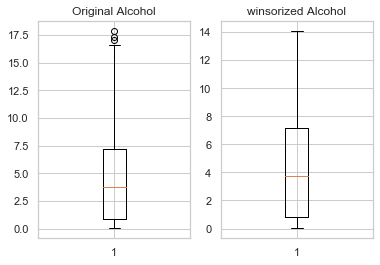

In [77]:
#winsorize alcohol...
plt.subplot(1,2,1)
OG_lifeexpectancy_df = lifeexpectancy_df['Alcohol']
plt.boxplot(OG_lifeexpectancy_df)
plt.title("Original Alcohol")

plt.subplot(1,2,2)
winsorized_alcohol = winsorize(lifeexpectancy_df['Alcohol'],(0.0,0.01))
plt.boxplot(winsorized_alcohol)
plt.title("winsorized Alcohol")

plt.show()

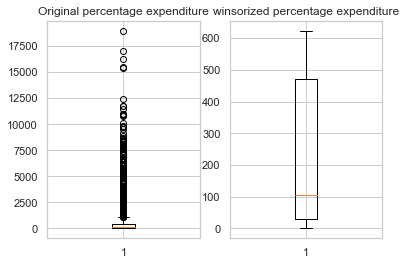

In [81]:
#winsorize percentage expenditure...
plt.subplot(1,2,1)
OG_lifeexpectancy_df = lifeexpectancy_df['percentage expenditure']
plt.boxplot(OG_lifeexpectancy_df)
plt.title("Original percentage expenditure")

plt.subplot(1,2,2)
winsorized_percentage_expenditure = winsorize(lifeexpectancy_df['percentage expenditure'],(0.0,0.2))
plt.boxplot(winsorized_percentage_expenditure)
plt.title("winsorized percentage expenditure")

plt.show()

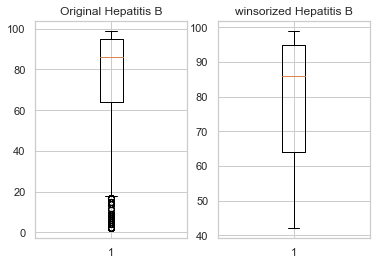

In [84]:
#winsorize Hepatitis B...
plt.subplot(1,2,1)
OG_lifeexpectancy_df = lifeexpectancy_df['Hepatitis B']
plt.boxplot(OG_lifeexpectancy_df)
plt.title("Original Hepatitis B")

plt.subplot(1,2,2)
winsorized_Hepatitis_B = winsorize(lifeexpectancy_df['Hepatitis B'],(0.15,0.0))
plt.boxplot(winsorized_Hepatitis_B)
plt.title("winsorized Hepatitis B")

plt.show()

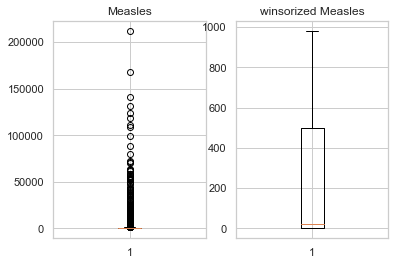

In [88]:
#winsorize Measles...
plt.subplot(1,2,1)
OG_lifeexpectancy_df = lifeexpectancy_df['Measles']
plt.boxplot(OG_lifeexpectancy_df)
plt.title("Measles")

plt.subplot(1,2,2)
winsorized_Measles = winsorize(lifeexpectancy_df['Measles'],(0.0,0.2))
plt.boxplot(winsorized_Measles)
plt.title("winsorized Measles")

plt.show()

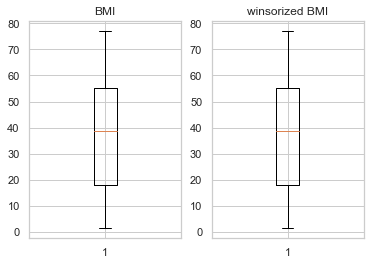

In [90]:
#winsorize BMI...
plt.subplot(1,2,1)
OG_lifeexpectancy_df = lifeexpectancy_df['BMI']
plt.boxplot(OG_lifeexpectancy_df)
plt.title("BMI")

plt.subplot(1,2,2)
winsorized_BMI = winsorize(lifeexpectancy_df['BMI'],(0.0,0.0))
plt.boxplot(winsorized_BMI)
plt.title("winsorized BMI")

plt.show()

>BMI did not need to be winsorized

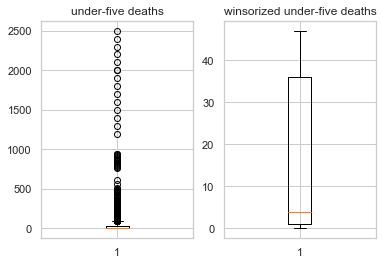

In [104]:
#winsorize under-five death...
plt.subplot(1,2,1)
OG_lifeexpectancy_df = lifeexpectancy_df['under-five deaths']
plt.boxplot(OG_lifeexpectancy_df)
plt.title("under-five deaths")

plt.subplot(1,2,2)
winsorized_under_five_death = winsorize(lifeexpectancy_df['under-five deaths'],(0.0,0.2))
plt.boxplot(winsorized_under_five_death)
plt.title("winsorized under-five deaths")

plt.show()

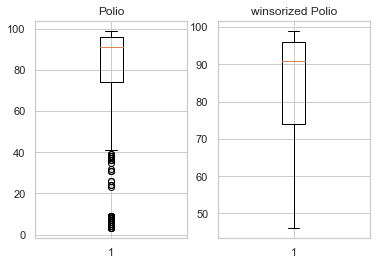

In [109]:
#winsorize Polio...
plt.subplot(1,2,1)
OG_lifeexpectancy_df = lifeexpectancy_df['Polio']
plt.boxplot(OG_lifeexpectancy_df)
plt.title("Polio")

plt.subplot(1,2,2)
winsorized_Polio = winsorize(lifeexpectancy_df['Polio'],(0.1,0.0))
plt.boxplot(winsorized_Polio)
plt.title("winsorized Polio")

plt.show()

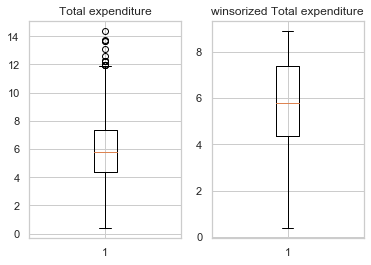

In [111]:
#winsorize Total expenditure...
plt.subplot(1,2,1)
OG_lifeexpectancy_df = lifeexpectancy_df['Total expenditure']
plt.boxplot(OG_lifeexpectancy_df)
plt.title("Total expenditure")

plt.subplot(1,2,2)
winsorized_Total_expenditure = winsorize(lifeexpectancy_df['Total expenditure'],(0.0,0.1))
plt.boxplot(winsorized_Total_expenditure)
plt.title("winsorized Total expenditure")

plt.show()

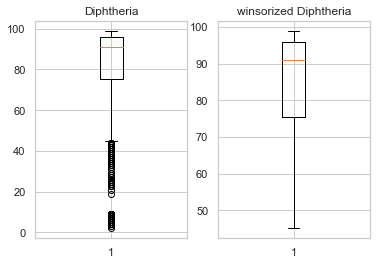

In [113]:
#winsorize Diphtheria...
plt.subplot(1,2,1)
OG_lifeexpectancy_df = lifeexpectancy_df['Diphtheria']
plt.boxplot(OG_lifeexpectancy_df)
plt.title("Diphtheria")

plt.subplot(1,2,2)
winsorized_Diphtheria = winsorize(lifeexpectancy_df['Diphtheria'],(0.1,0.0))
plt.boxplot(winsorized_Diphtheria)
plt.title("winsorized Diphtheria")

plt.show()

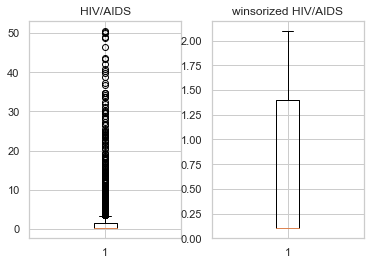

In [117]:
#winsorize HIV/AIDS...
plt.subplot(1,2,1)
OG_lifeexpectancy_df = lifeexpectancy_df['HIV/AIDS']
plt.boxplot(OG_lifeexpectancy_df)
plt.title("HIV/AIDS")

plt.subplot(1,2,2)
winsorized_HIV_AIDS = winsorize(lifeexpectancy_df['HIV/AIDS'],(0.0,0.2))
plt.boxplot(winsorized_HIV_AIDS)
plt.title("winsorized HIV/AIDS")

plt.show()

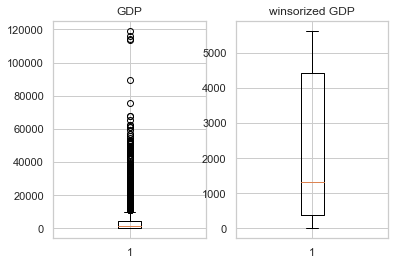

In [120]:
#winsorize GDP...
plt.subplot(1,2,1)
OG_lifeexpectancy_df = lifeexpectancy_df['GDP']
plt.boxplot(OG_lifeexpectancy_df)
plt.title("GDP")

plt.subplot(1,2,2)
winsorized_GDP = winsorize(lifeexpectancy_df['GDP'],(0.0,0.2))
plt.boxplot(winsorized_GDP)
plt.title("winsorized GDP")

plt.show()

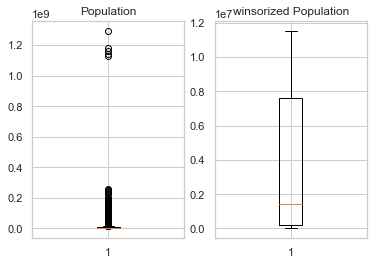

In [123]:
#winsorize Population...
plt.subplot(1,2,1)
OG_lifeexpectancy_df = lifeexpectancy_df['Population']
plt.boxplot(OG_lifeexpectancy_df)
plt.title("Population")

plt.subplot(1,2,2)
winsorized_Population = winsorize(lifeexpectancy_df['Population'],(0.0,0.2))
plt.boxplot(winsorized_Population)
plt.title("winsorized Population")

plt.show()

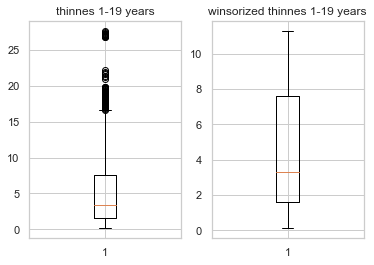

In [125]:
#winsorize thinnes 1-19 years...
plt.subplot(1,2,1)
OG_lifeexpectancy_df = lifeexpectancy_df['thinnes 1-19 years']
plt.boxplot(OG_lifeexpectancy_df)
plt.title("thinnes 1-19 years")

plt.subplot(1,2,2)
winsorized_thinnes_1_19 = winsorize(lifeexpectancy_df['thinnes 1-19 years'],(0.0,0.1))
plt.boxplot(winsorized_thinnes_1_19)
plt.title("winsorized thinnes 1-19 years")

plt.show()

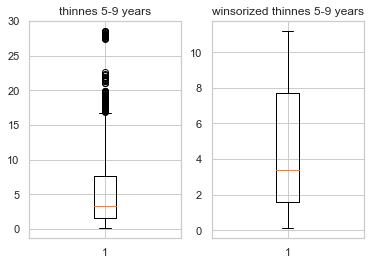

In [128]:
#winsorize thinnes 5-9 years...
plt.subplot(1,2,1)
OG_lifeexpectancy_df = lifeexpectancy_df['thinnes 5-9 years']
plt.boxplot(OG_lifeexpectancy_df)
plt.title("thinnes 5-9 years")

plt.subplot(1,2,2)
winsorized_thinnes_5_9 = winsorize(lifeexpectancy_df['thinnes 5-9 years'],(0.0,0.1))
plt.boxplot(winsorized_thinnes_5_9)
plt.title("winsorized thinnes 5-9 years")

plt.show()

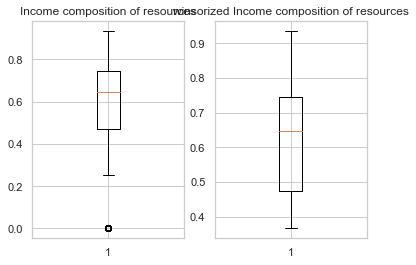

In [130]:
#winsorize Income composition of resources...
plt.subplot(1,2,1)
OG_lifeexpectancy_df = lifeexpectancy_df['Income composition of resources']
plt.boxplot(OG_lifeexpectancy_df)
plt.title("Income composition of resources")

plt.subplot(1,2,2)
winsorized_Income = winsorize(lifeexpectancy_df['Income composition of resources'],(0.1,0.0))
plt.boxplot(winsorized_Income)
plt.title("winsorized Income composition of resources")

plt.show()

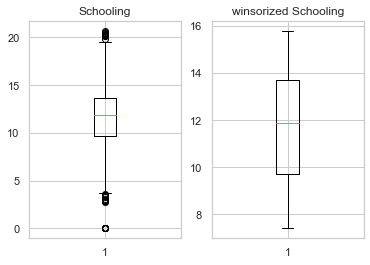

In [132]:
#winsorize Schooling...
plt.subplot(1,2,1)
OG_lifeexpectancy_df = lifeexpectancy_df['Schooling']
plt.boxplot(OG_lifeexpectancy_df)
plt.title("Schooling")

plt.subplot(1,2,2)
winsorized_Schooling = winsorize(lifeexpectancy_df['Schooling'],(0.1,0.1))
plt.boxplot(winsorized_Schooling)
plt.title("winsorized Schooling")

plt.show()

In [144]:
lifeexpectancy_df['winsorized_life_expectancy'] = winsorized_life_expectancy
lifeexpectancy_df['winsorized_Adult_Mortality'] = winsorized_Adult_Mortality
lifeexpectancy_df['winsorized_infant_deaths'] = winsorized_infant_deaths 
lifeexpectancy_df['winsorized_alcohol'] = winsorized_alcohol
lifeexpectancy_df['winsorized_percentage_expenditure'] = winsorized_percentage_expenditure
lifeexpectancy_df['winsorized_Hepatitis_B'] = winsorized_Hepatitis_B
lifeexpectancy_df['winsorized_Measles'] = winsorized_Measles
lifeexpectancy_df['winsorized_BMI'] = winsorized_BMI
lifeexpectancy_df['winsorized_under_five_death'] = winsorized_under_five_death
lifeexpectancy_df['winsorized_Polio'] = winsorized_Polio
lifeexpectancy_df['winsorized_Total_expenditure'] = winsorized_Total_expenditure
lifeexpectancy_df['winsorized_Diphtheria'] = winsorized_Diphtheria
lifeexpectancy_df['winsorized_HIV_AIDS'] = winsorized_HIV_AIDS
lifeexpectancy_df['winsorized_GDP'] = winsorized_GDP
lifeexpectancy_df['winsorized_Population'] = winsorized_Population
lifeexpectancy_df['winsorized_thinnes_1_19'] = winsorized_thinnes_1_19
lifeexpectancy_df['winsorized_thinnes_5_9'] = winsorized_thinnes_5_9
lifeexpectancy_df['winsorized_Income'] = winsorized_Income
lifeexpectancy_df['winsorized_Schooling'] = winsorized_Schooling

In [145]:
lifeexpectancy_df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinnes 1-19 years,thinnes 5-9 years,Income composition of resources,Schooling,winsorized_life_expectancy,winsorized_Adult_Mortality,winsorized_infant_deaths,winsorized_alcohol,winsorized_percentage_expenditure,winsorized_Hepatitis_B,winsorized_Measles,winsorized_BMI,winsorized_under_five_death,winsorized_Polio,winsorized_Total_expenditure,winsorized_Diphtheria,winsorized_HIV_AIDS,winsorized_GDP,winsorized_Population,winsorized_thinnes_1_19,winsorized_thinnes_5_9,winsorized_Income,winsorized_Schooling,winsorized_infant_deaths
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0,221.0,61,0.01,71.279624,65.0,982,19.1,47,46.0,8.16,65.0,0.1,584.259210,11536615.0,11.3,11.2,0.479,10.1,61
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,59.9,221.0,61,0.01,73.523582,62.0,492,18.6,47,58.0,8.18,62.0,0.1,612.696514,327582.0,11.3,11.2,0.476,10.0,61
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,59.9,221.0,61,0.01,73.219243,64.0,430,18.1,47,62.0,8.13,64.0,0.1,631.744976,11536615.0,11.3,11.2,0.470,9.9,61
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,59.5,221.0,61,0.01,78.184215,67.0,982,17.6,47,67.0,8.52,67.0,0.1,669.959000,3696958.0,11.3,11.2,0.463,9.8,61
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,59.2,221.0,61,0.01,7.097109,68.0,982,17.2,47,68.0,7.87,68.0,0.1,63.537231,2978599.0,11.3,11.2,0.454,9.5,61


In [146]:
lifeexpectancy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 2937
Data columns (total 42 columns):
Country                              1987 non-null object
Year                                 1987 non-null int64
Status                               1987 non-null object
Life expectancy                      1987 non-null float64
Adult Mortality                      1987 non-null float64
infant deaths                        1987 non-null int64
Alcohol                              1987 non-null float64
percentage expenditure               1987 non-null float64
Hepatitis B                          1987 non-null float64
Measles                              1987 non-null int64
BMI                                  1987 non-null float64
under-five deaths                    1987 non-null int64
Polio                                1987 non-null float64
Total expenditure                    1987 non-null float64
Diphtheria                           1987 non-null float64
HIV/AIDS          

In [147]:
#create a winsorized dataframe lifeexpectancy_winsorized_df...
lifeexpectancy_winsorized_df = lifeexpectancy_df[['Country', 'Year', 'Status', 'winsorized_life_expectancy',
    'winsorized_Adult_Mortality', 'winsorized_infant_deaths', 'winsorized_alcohol', 'winsorized_percentage_expenditure',
    'winsorized_Hepatitis_B', 'winsorized_Measles', 'winsorized_BMI', 'winsorized_under_five_death', 'winsorized_Polio',
    'winsorized_Total_expenditure', 'winsorized_Diphtheria', 'winsorized_HIV_AIDS', 'winsorized_GDP', 'winsorized_Population',
    'winsorized_thinnes_1_19', 'winsorized_thinnes_5_9', 'winsorized_Income', 'winsorized_Schooling']].copy()

In [148]:
lifeexpectancy_winsorized_df.head()

,Country,Year,Status,winsorized_life_expectancy,winsorized_Adult_Mortality,winsorized_infant_deaths,winsorized_alcohol,winsorized_percentage_expenditure,winsorized_Hepatitis_B,winsorized_Measles,winsorized_BMI,winsorized_under_five_death,winsorized_Polio,winsorized_Total_expenditure,winsorized_Diphtheria,winsorized_HIV_AIDS,winsorized_GDP,winsorized_Population,winsorized_thinnes_1_19,winsorized_thinnes_5_9,winsorized_Income,winsorized_Schooling
0,Afghanistan,2015,Developing,65.0,221.0,61,0.01,71.279624,65.0,982,19.1,47,46.0,8.16,65.0,0.1,584.259210,11536615.0,11.3,11.2,0.479,10.1
1,Afghanistan,2014,Developing,59.9,221.0,61,0.01,73.523582,62.0,492,18.6,47,58.0,8.18,62.0,0.1,612.696514,327582.0,11.3,11.2,0.476,10.0
2,Afghanistan,2013,Developing,59.9,221.0,61,0.01,73.219243,64.0,430,18.1,47,62.0,8.13,64.0,0.1,631.744976,11536615.0,11.3,11.2,0.470,9.9
3,Afghanistan,2012,Developing,59.5,221.0,61,0.01,78.184215,67.0,982,17.6,47,67.0,8.52,67.0,0.1,669.959000,3696958.0,11.3,11.2,0.463,9.8
4,Afghanistan,2011,Developing,59.2,221.0,61,0.01,7.097109,68.0,982,17.2,47,68.0,7.87,68.0,0.1,63.537231,2978599.0,11.3,11.2,0.454,9.5


##### Explore the data using univariate and multivariate exploration techniques. You should pay special attention to your target variable. In this regard, your focus should be on finding the relevant variables that may affect life expectancy.

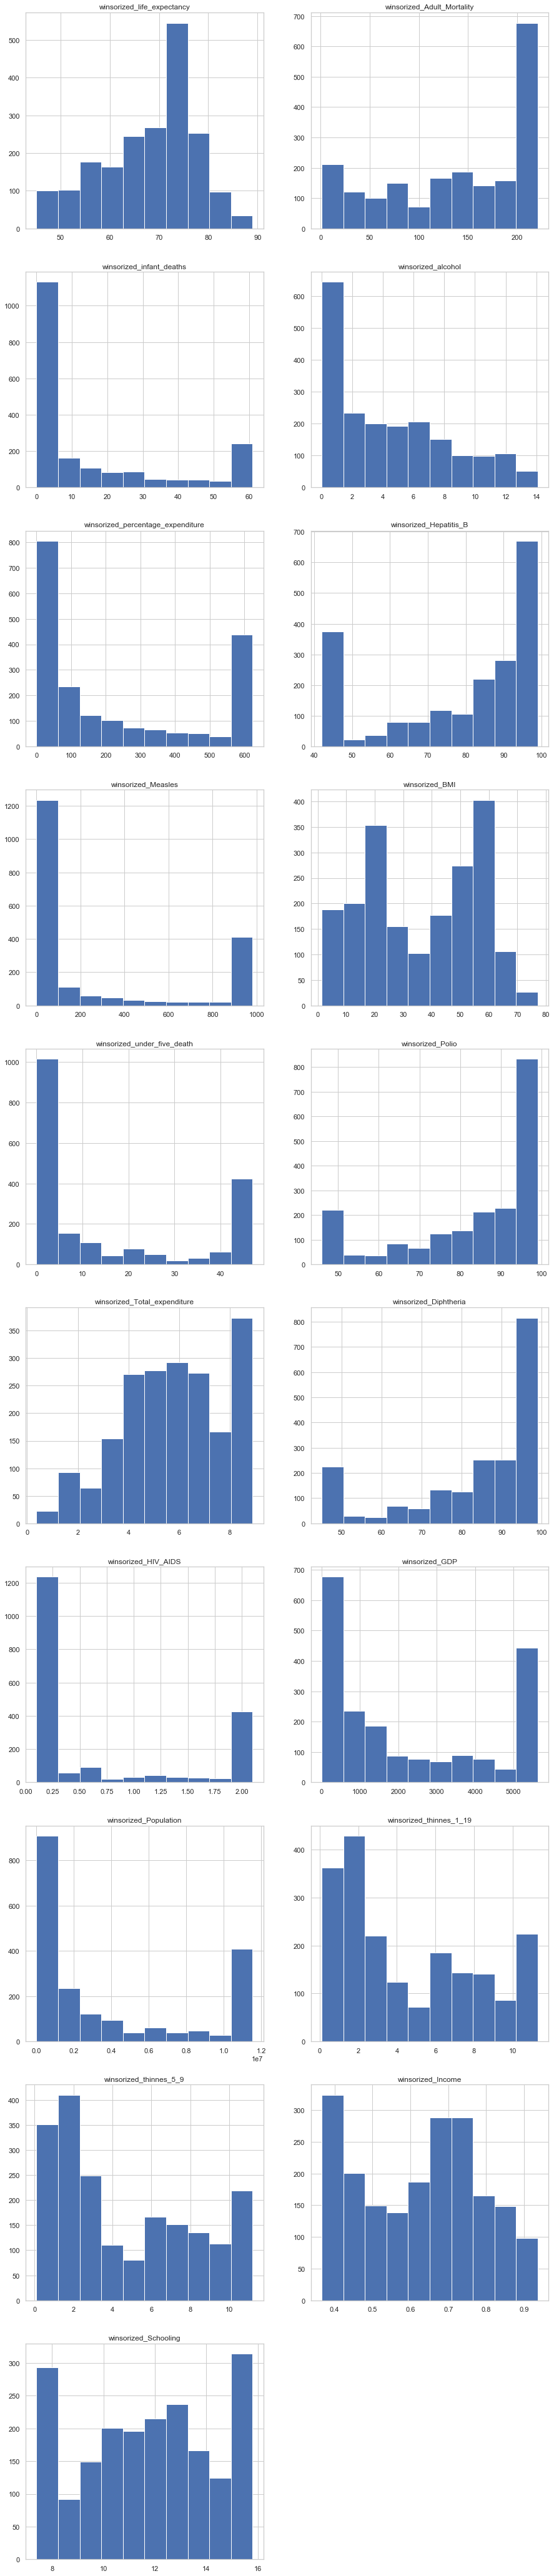

In [153]:
#first display the distribution of each numerical variable...

# Distribution of each numerical variable.
all_col = ['winsorized_life_expectancy',
    'winsorized_Adult_Mortality', 'winsorized_infant_deaths', 'winsorized_alcohol', 'winsorized_percentage_expenditure',
    'winsorized_Hepatitis_B', 'winsorized_Measles', 'winsorized_BMI', 'winsorized_under_five_death', 'winsorized_Polio',
    'winsorized_Total_expenditure', 'winsorized_Diphtheria', 'winsorized_HIV_AIDS', 'winsorized_GDP', 'winsorized_Population',
    'winsorized_thinnes_1_19', 'winsorized_thinnes_5_9', 'winsorized_Income', 'winsorized_Schooling']

plt.figure(figsize=(15,75))

for i in range(len(all_col)):
    plt.subplot(10,2,i+1)
    plt.hist(lifeexpectancy_winsorized_df[all_col[i]])
    plt.title(all_col[i])

plt.show()

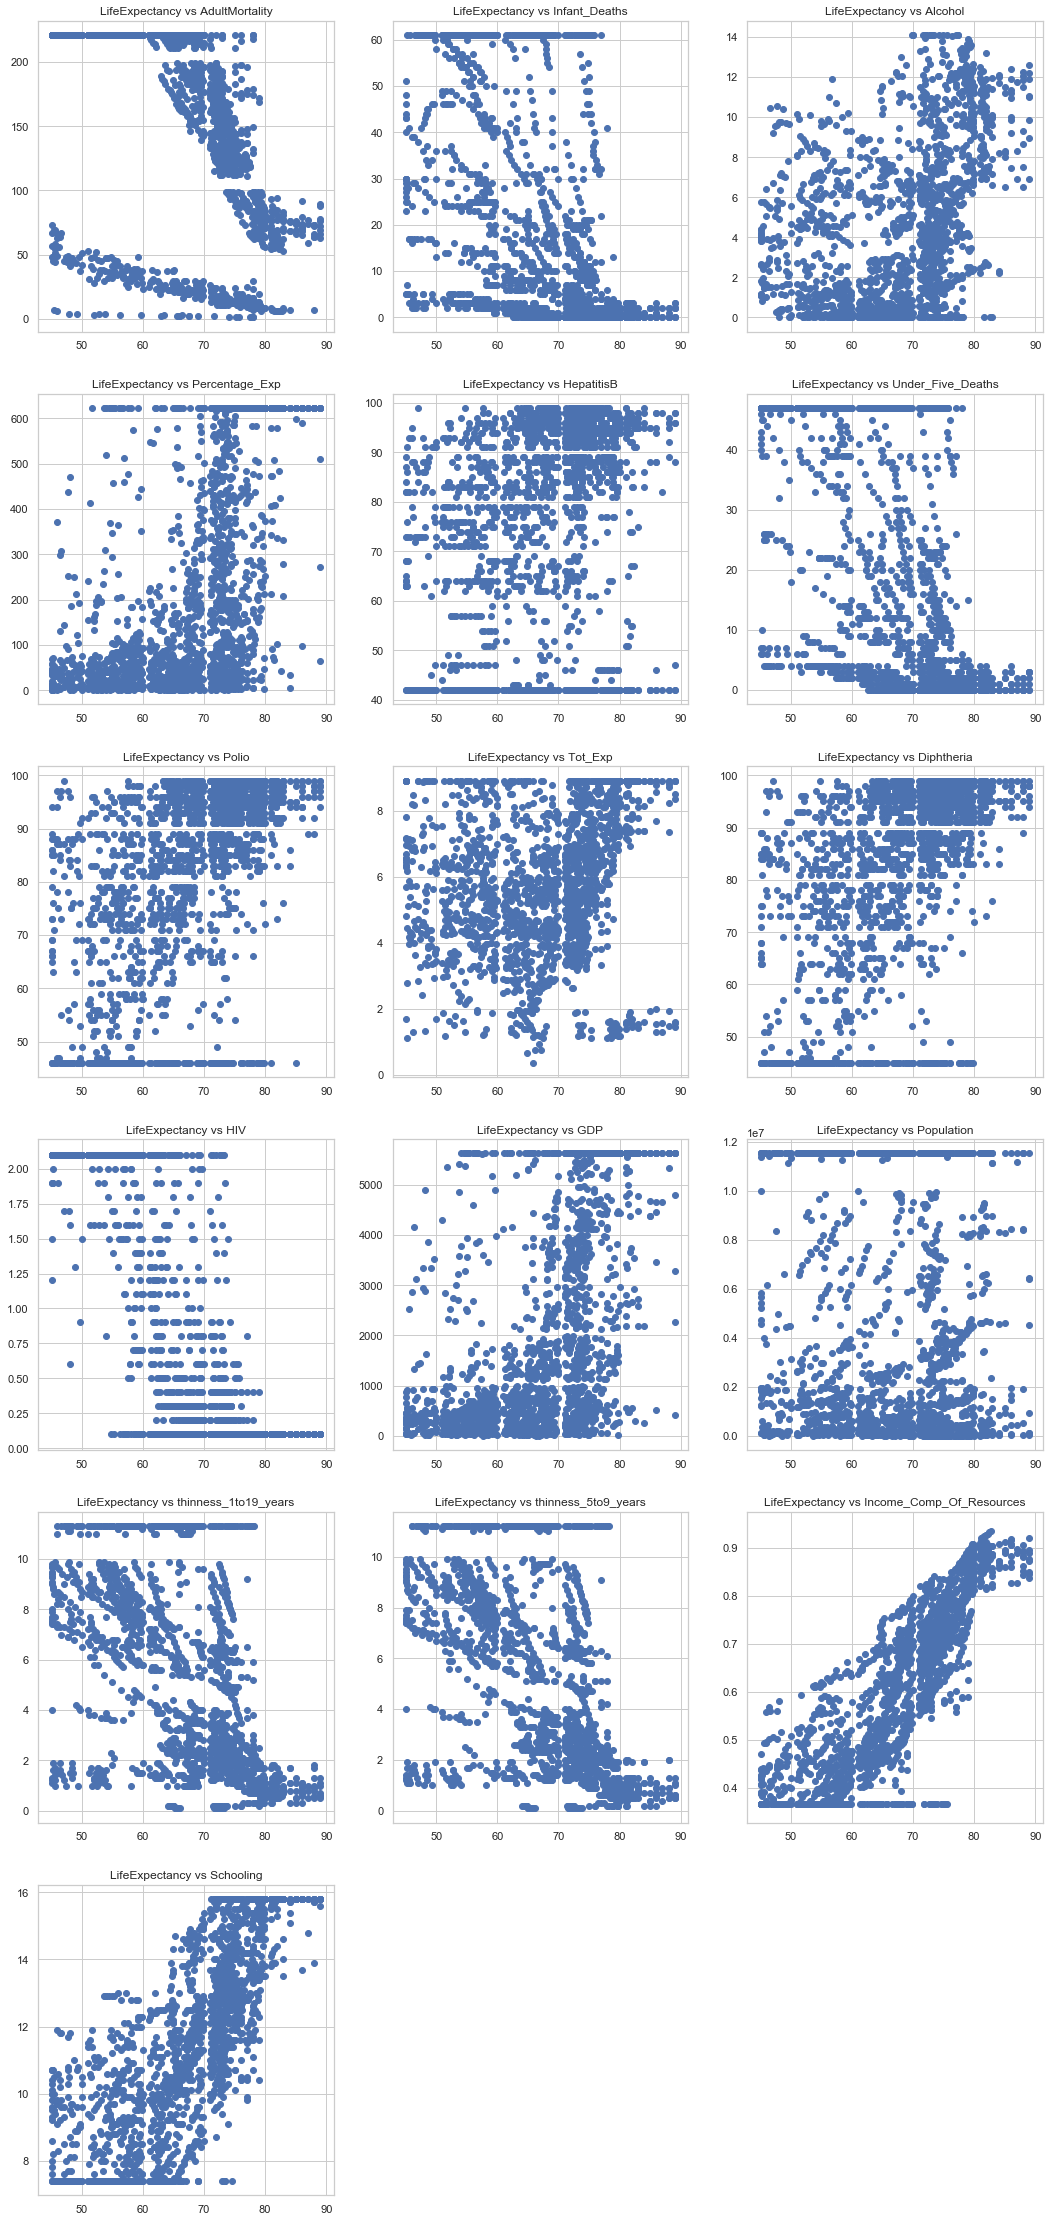

In [157]:
# Scatter plot between the target variable(winsorized_Life_Expectancy) and all continuous variables.
plt.figure(figsize=(18,40))

plt.subplot(6,3,1)
plt.scatter(lifeexpectancy_winsorized_df["winsorized_life_expectancy"], lifeexpectancy_winsorized_df["winsorized_Adult_Mortality"])
plt.title("LifeExpectancy vs AdultMortality")

plt.subplot(6,3,2)
plt.scatter(lifeexpectancy_winsorized_df["winsorized_life_expectancy"], lifeexpectancy_winsorized_df["winsorized_infant_deaths"])
plt.title("LifeExpectancy vs Infant_Deaths")

plt.subplot(6,3,3)
plt.scatter(lifeexpectancy_winsorized_df["winsorized_life_expectancy"], lifeexpectancy_winsorized_df["winsorized_alcohol"])
plt.title("LifeExpectancy vs Alcohol")

plt.subplot(6,3,4)
plt.scatter(lifeexpectancy_winsorized_df["winsorized_life_expectancy"], lifeexpectancy_winsorized_df["winsorized_percentage_expenditure"])
plt.title("LifeExpectancy vs Percentage_Exp")

plt.subplot(6,3,5)
plt.scatter(lifeexpectancy_winsorized_df["winsorized_life_expectancy"], lifeexpectancy_winsorized_df["winsorized_Hepatitis_B"])
plt.title("LifeExpectancy vs HepatitisB")

plt.subplot(6,3,6)
plt.scatter(lifeexpectancy_winsorized_df["winsorized_life_expectancy"], lifeexpectancy_winsorized_df["winsorized_under_five_death"])
plt.title("LifeExpectancy vs Under_Five_Deaths")

plt.subplot(6,3,7)
plt.scatter(lifeexpectancy_winsorized_df["winsorized_life_expectancy"], lifeexpectancy_winsorized_df["winsorized_Polio"])
plt.title("LifeExpectancy vs Polio")

plt.subplot(6,3,8)
plt.scatter(lifeexpectancy_winsorized_df["winsorized_life_expectancy"], lifeexpectancy_winsorized_df["winsorized_Total_expenditure"])
plt.title("LifeExpectancy vs Tot_Exp")

plt.subplot(6,3,9)
plt.scatter(lifeexpectancy_winsorized_df["winsorized_life_expectancy"], lifeexpectancy_winsorized_df["winsorized_Diphtheria"])
plt.title("LifeExpectancy vs Diphtheria")

plt.subplot(6,3,10)
plt.scatter(lifeexpectancy_winsorized_df["winsorized_life_expectancy"], lifeexpectancy_winsorized_df["winsorized_HIV_AIDS"])
plt.title("LifeExpectancy vs HIV")

plt.subplot(6,3,11)
plt.scatter(lifeexpectancy_winsorized_df["winsorized_life_expectancy"], lifeexpectancy_winsorized_df["winsorized_GDP"])
plt.title("LifeExpectancy vs GDP")

plt.subplot(6,3,12)
plt.scatter(lifeexpectancy_winsorized_df["winsorized_life_expectancy"], lifeexpectancy_winsorized_df["winsorized_Population"])
plt.title("LifeExpectancy vs Population")

plt.subplot(6,3,13)
plt.scatter(lifeexpectancy_winsorized_df["winsorized_life_expectancy"], lifeexpectancy_winsorized_df["winsorized_thinnes_1_19"])
plt.title("LifeExpectancy vs thinness_1to19_years")

plt.subplot(6,3,14)
plt.scatter(lifeexpectancy_winsorized_df["winsorized_life_expectancy"], lifeexpectancy_winsorized_df["winsorized_thinnes_5_9"])
plt.title("LifeExpectancy vs thinness_5to9_years")

plt.subplot(6,3,15)
plt.scatter(lifeexpectancy_winsorized_df["winsorized_life_expectancy"], lifeexpectancy_winsorized_df["winsorized_Income"])
plt.title("LifeExpectancy vs Income_Comp_Of_Resources")

plt.subplot(6,3,16)
plt.scatter(lifeexpectancy_winsorized_df["winsorized_life_expectancy"], lifeexpectancy_winsorized_df["winsorized_Schooling"])
plt.title("LifeExpectancy vs Schooling")


plt.show()

>We can see the relationship each variable has with Life Expectancy. Lets also check to see if these variables are correlated with each other.

In [158]:
#Correlation of winsorized variables
lifeexpectancy_winsorized_df = lifeexpectancy_df.iloc[:,21:]
lifeexpectancy_winsorized_df['Country'] = lifeexpectancy_df['Country']
lifeexpectancy_winsorized_df['Year'] = lifeexpectancy_df['Year']
lifeexpectancy_winsorized_df['Status'] = lifeexpectancy_df['Status']
le_win_num = lifeexpectancy_winsorized_df.iloc[:,:-3]
cormat = le_win_num.corr()

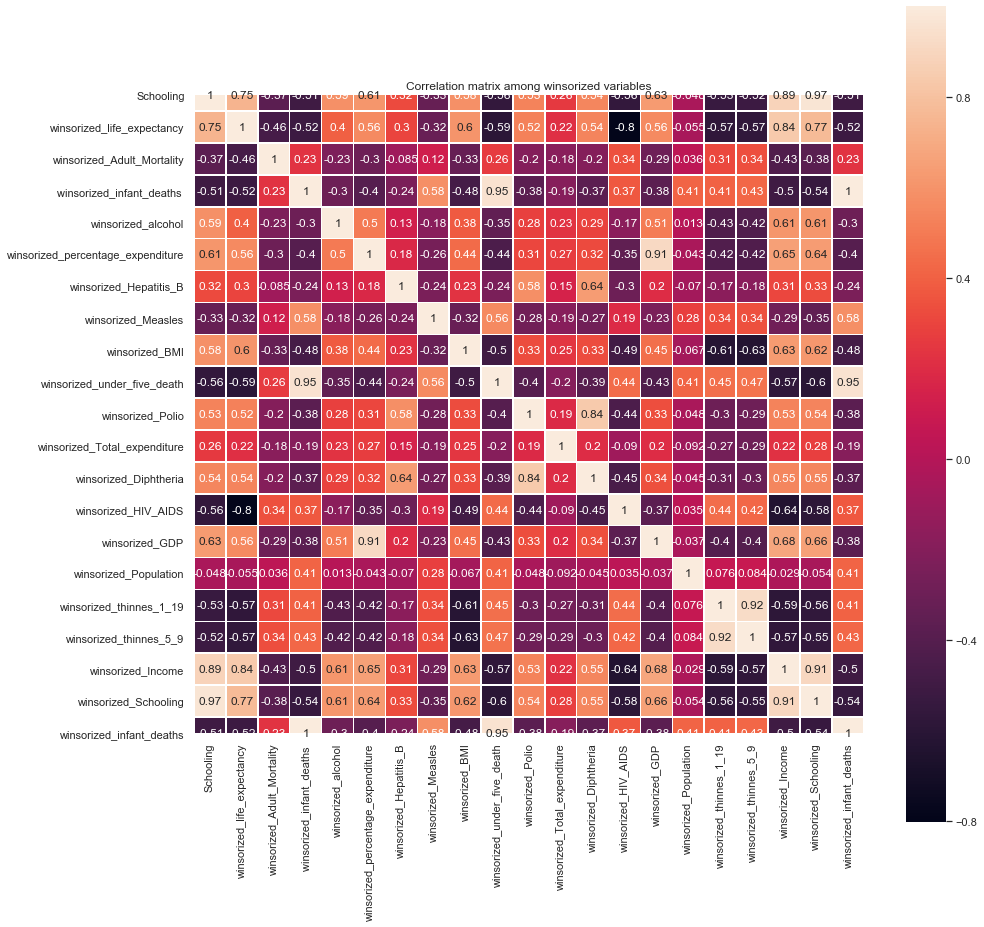

In [159]:
#Using heatmap to observe correlations.
plt.figure(figsize=(15,15))
sns.heatmap(cormat, square=True, annot=True, linewidths=.5)
plt.title("Correlation matrix among winsorized variables")
plt.show()

##### In the feature engineering step, you need to select a suite of variables that you think would be ideal in the modeling phase. More concretely, you may discard some variables that are very correlated with the other ones or the variables that you think irrelevant with the life expectancy.

>From the lineplots we can see that the following variables are useful:
* winsorized_Schooling
* winsorized_Income
* winsorized_HIV_AIDS
* winsorized_Adult_Mortality

>We can also guess that the variable Status is also significant. Lets test first and see if countries that are developed have longer life expectancy than countries that are not developed.

In [161]:
round(lifeexpectancy_df[['Status','Life expectancy']].groupby(['Status']).mean(),2)

,Life expectancy
Status,
Developed,78.83
Developing,66.16


>Developed countries have on average a 12 year longer Life Expectancy than non developed countries. Lets do a t-test and ensure that this is a valid conclusion and not just noise.

In [162]:
stats.ttest_ind(lifeexpectancy_df.loc[lifeexpectancy_df['Status']=='Developed','Life expectancy'],lifeexpectancy_df.loc[lifeexpectancy_df['Status']=='Developing','Life expectancy'])

Ttest_indResult(statistic=22.92439377113489, pvalue=2.2504696584331004e-103)

> We get a p-value significantly less than 0.05. We can therefore be confident that the difference in means in statistically signifcant and not just due to noise.

##### Create a dataframe of just the feautres selected

In [163]:
#create a dataframe of the selected features as features_df
features_df = lifeexpectancy_winsorized_df[['Status','winsorized_life_expectancy','winsorized_Income','winsorized_HIV_AIDS','winsorized_Adult_Mortality']]

In [164]:
features_df.head()

,Status,winsorized_life_expectancy,winsorized_Income,winsorized_HIV_AIDS,winsorized_Adult_Mortality
0,Developing,65.0,0.479,0.1,221.0
1,Developing,59.9,0.476,0.1,221.0
2,Developing,59.9,0.470,0.1,221.0
3,Developing,59.5,0.463,0.1,221.0
4,Developing,59.2,0.454,0.1,221.0


>The **Status** variable needs to be converted to a numeric value now so that we can utilize that variable in our model.

In [166]:
#convert status to a numerical category utilizing dummies(one-hot encoding)
features_df = pd.concat([features_df,pd.get_dummies(features_df['Status'],drop_first=True)],axis=1)
final = features_df.drop('Status',axis=1)
final.head()

,winsorized_life_expectancy,winsorized_Income,winsorized_HIV_AIDS,winsorized_Adult_Mortality,Developing
0,65.0,0.479,0.1,221.0,1
1,59.9,0.476,0.1,221.0,1
2,59.9,0.470,0.1,221.0,1
3,59.5,0.463,0.1,221.0,1
4,59.2,0.454,0.1,221.0,1
